### Perceptron for Banknotes/Checks Authentication 


#### Perceptron<br>
Perceptron is a supervised learning binary classifier.
In order to predict, perceptron first tries to find an hyperplane between the 2 sets of data. If the hyperplane exists the data can be easily classified.

The data was obtained from:<br>
__Dua, D. and Graff, C. (2019). UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/banknote+authentication). Irvine, CA: University of California, School of Information and Computer Science.__<br>

Abstract: Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.<br>

Features:<br> 
 1. variance of Wavelet Transformed image (continuous)
 2. skewness of Wavelet Transformed image (continuous)
 3. curtosis of Wavelet Transformed image (continuous)
 4. entropy of image (continuous)
 5. class (integer)

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns

#### Loading Data

In [107]:
#Importing the text file
data=np.loadtxt('data_banknote_authentication.txt',delimiter=',')
print(data.shape)

(1372, 5)


Boxplot of features:


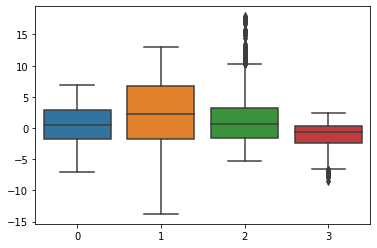

In [108]:
print('Boxplot of features:')
sns.boxplot(data=data[:,0:4])

Since any variable seems to be way to different than the rest, I think I will be ok without normalizing the data.

#### Randomly Generated Train and Test Sets

In [109]:
random_column = np.array(np.random.rand(data.shape[0]))  #create random column so I can divide train/test sets
data=np.concatenate((data,random_column.reshape(data.shape[0],1)),axis=1)  #add random values column to set
train=data[data[:,5]<=.7]  #Aproximately 70% of the data will be used as training data
test=data[data[:,5]>.7]    #rest will be testing data
print("Proportion of data used for training",train.shape[0]/data.shape[0])

Proportion of data used for training 0.706268221574344


In [110]:
#Train features and y
train=train[:,0:train.shape[1]-1]          #eliminate the random column, we don't need it anymore
y_train=train[:,-1]                        #get y from dataset (which is now the lat column)
y_train=np.where(y_train==0, -1, y_train)  #replace ceros for -1
x_train=train[:,0:train.shape[1]-1]        #eliminating the y column, this is now our feature set

#Test features and y. Same as above but with test set
test=test[:,0:test.shape[1]-1]
y_test=test[:,-1]
y_test=np.where(y_test==0, -1, y_test)
x_test=test[:,0:test.shape[1]-1]

In [111]:
#summary of positves and negatives in both datasets
print('train positives',np.sum(y_train[y_train==1]),'\ttrain negatives',-np.sum(y_train[y_train==-1]))
print('test positives',np.sum(y_test[y_test==1]),'\ttest negatives',-np.sum(y_test[y_test==-1]))

train positives 427.0 	train negatives 542.0
test positives 183.0 	test negatives 220.0


In [112]:
def perceptron_update(x,y,w):
    """
    Input:
    x : input vector with features
    y : labels (-1 or +1)
    w : weight vector, same dimensions as x
    Output:
    w : updated weight vector
    """
    w=w+x*y
    return w

In [113]:
def perceptron(xs,ys):
    """
    Input:
    xs : n input vectors of d dimensions (nxd)
    ys : n labels (-1 or +1)
    Output:
    w : final weight vector (1xd)
    b : bias term
    """
    n, d = xs.shape     # so we have n input vectors, of d dimensions each
    w = np.zeros(d)
    b = 0.0
    iteration=0         #will keep in max iterations in 100 but if there is an hyperplane it will find it way before
    while iteration < 100:
        m=0
        for i in np.random.permutation(n):   #data has to be randomly loaded to prevent learning order too
            if ( ( (xs[i]@w.T)+b ) * ys[i] )<=0:
                w=perceptron_update(xs[i],ys[i],w)
                b+=ys[i]
                m+=1
        iteration += 1
        if m==0:
            break
    return w,b

Now, we will be calculating the weights (vector) and bias and use it to predict y in test sample

In [114]:
#Final weight vector and bias
weights,bias=perceptron(x_train,y_train)

In [115]:
def perceptron_classify(xs,w,b=None):
    """
    Make predictions with a linear classifier
    Input:
    xs : n input vectors of d dimensions (nxd) [could also be a single vector of d dimensions]
    w : weight vector of dimensionality d
    b : bias (scalar)
    Output:
    preds: predictions (1xn)
    """
    w = w.flatten()
    predictions=np.zeros(xs.shape[0])
    if b==None:
        b=0
    for i in range(xs.shape[0]):
        if (w.T@xs[i]+b)>=0:
            predictions[i]=1
        else:
            predictions[i]=-1
    return predictions

#### Prediction

In [116]:
print(perceptron_classify(x_test,weights,bias))

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

#### Accuracy of the model

In [117]:
print('Accuracy: ',np.sum(classify_linear(x_test,weights,bias)==y_test)/y_test.shape[0])

Accuracy:  0.9975186104218362


#### Summary
Perceptron works perfectly when it is easy to separate the positives from the negatives and all features have equal weight. In some cases normalizing data is necessary in order to prevent one variable having more weight than the rest.